ESC 后 H键显示快捷键帮助 

# K-临近算法 

使用Python导入数据

In [21]:
from numpy import *
import operator

- 第一个是科学计算包Numpy
- 第二个是运算符模块

In [22]:
def createDataSet():
    group = array ([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group, labels

将上头编码打包成为kNN.py文件

In [23]:
import kNN

In [24]:
group, labels = kNN.createDataSet()

In [25]:
group

array([[ 1. ,  1.1],
       [ 1. ,  1. ],
       [ 0. ,  0. ],
       [ 0. ,  0.1]])

In [26]:
labels

['A', 'A', 'B', 'B']

## 了解kNN分类算法


__伪代码__为：对未知类别属性的数据集中的每个点依次执行以下操作

1. 计算已知类别数据集中的点与当前点之间的距离
    
2. 按照距离递增次序排序
    
3. 选取与当前点距离最小的k个点
    
4. 确定前k个点所在类别出现频率
     
5. 范围前k个点出现频率最高的类别作为当前点的预测分类
    

In [27]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**2
    sortedDistIndicies = distances.argsort()
    classCount={}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)# 源代码中iteritems修改为items 
    return sortedClassCount[0][0]
    

四个参数分别为 ： 用于分类的输入向量为$inX$, 输入的训练样本集为dataSet，标签向量为labels。最后的参数k表示用于选择最近邻居的数目。其中标签向量的元素数目与矩阵dataSet的行数相同 

计算距离使用欧氏距离 两个向量点$xA$和$xB$的距离为：
    $$
    d=\sqrt{(xA_0 - xB_0)^2 + (xA_1 - xB_1)^2}
    $$
    
 计算完所有点的距离后，对数据按照从小到大的次序排序，确定前k个距离最小元素所在的为主要分类，$k$总为正整数。 最后返回发生频率最高的元素标签。

构造的函数classify0也被导入进kNN。

In [28]:
kNN.classify0([0,0], group, labels, 3)

'B'

2017.3.11

#### 将文本记录转换为Numpy的解析程序

In [29]:
def file2matrix(filename):
    fr = open(filename)
    arrayOLines =fr.readlines()
    numberOfLines = len(arrayOLines)     # get the number of lines return
    returnMat = zeros((numberOfLines, 3))# prepare matrix to return
    classLabelVector = []                # prepare label return
    index = 0
    for line in arrayOLines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat,classLabelVector

In [30]:
datingDataMat,datingLabels = kNN.file2matrix('G:\\桌面\\jupyter notebook\\datingTestset2.txt')

In [31]:
datingDataMat,datingLabels[0:20]

(array([[  4.09200000e+04,   8.32697600e+00,   9.53952000e-01],
        [  1.44880000e+04,   7.15346900e+00,   1.67390400e+00],
        [  2.60520000e+04,   1.44187100e+00,   8.05124000e-01],
        ..., 
        [  2.65750000e+04,   1.06501020e+01,   8.66627000e-01],
        [  4.81110000e+04,   9.13452800e+00,   7.28045000e-01],
        [  4.37570000e+04,   7.88260100e+00,   1.33244600e+00]]),
 [3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3])

使用Matplotlib创建散点图



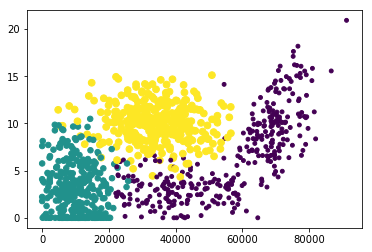

In [32]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax .scatter(datingDataMat[:,0], datingDataMat[:,1],15*array(datingLabels),15*array(datingLabels))#调用scatter函数的参数，增加了颜色和大小；第一个是大小，第二个是颜色。方便区分
plt.show()

http://img.blog.csdn.net/20151104231449817?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center
scatter函数的参数设定

## 归一化准备
计算距离时，若无归一化，则如下式
$$
\sqrt{(0-67)^2+(20000-32000)^2+(1.1-0.1)^2}
$$
由数据可以看出，数据差值最大的属性对计算计算结果影响最大。这说明需要将数据归一化，以消除因为数据本身属性所带来的影响。
将所有数据的取值范围放置于0-1或-1到1的区间内：

---
归一化的公式为
$$
newValue = \frac{(oldValue-min)}{(max-min)}
$$
在kNN中增加一个新函数autoNorm(),该函数可以自动将数字特征值转化为0到1的区间。

In [33]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals -minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m,1))# 利用NumPy库中的tile()将变量内容复制成输入矩阵同样大小的矩阵
    normDataSet = normDataSet/tile(ranges, (m,1))# 此处为具体特征值相除。
    return normDataSet, ranges, minVals

In [34]:
normMat, ranges, minVals = kNN.autoNorm(datingDataMat)

In [35]:
normMat


array([[ 0.44832535,  0.39805139,  0.56233353],
       [ 0.15873259,  0.34195467,  0.98724416],
       [ 0.28542943,  0.06892523,  0.47449629],
       ..., 
       [ 0.29115949,  0.50910294,  0.51079493],
       [ 0.52711097,  0.43665451,  0.4290048 ],
       [ 0.47940793,  0.3768091 ,  0.78571804]])

In [36]:
ranges

array([  9.12730000e+04,   2.09193490e+01,   1.69436100e+00])

In [37]:
minVals

array([ 0.      ,  0.      ,  0.001156])

#### 算法测试：完整测试程序验证分类器
只提供已有数据的百分之90作为训练样本训练分类器。而用其中百分之10来测试我们的分类器
在kNN.py中创建datingClassTest来测试分类器效果。

In [38]:
def datingClassTest():
    hoRatio = 0.10
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')# 勘误 这里要使用datingTestSet2.txt 要不然会报错。
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]#shape函数可以导出矩阵的形状[0]为行数[1]为列数
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],5)
        print ("the classifier came back with: %d,the real answer is: %d" % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print("the total error rate is: %f" % (errorCount/float(numTestVecs)))
    

In [39]:
kNN.datingClassTest()


the classifier came back with: 3,the real answer is: 3
the classifier came back with: 2,the real answer is: 2
the classifier came back with: 1,the real answer is: 1
the classifier came back with: 1,the real answer is: 1
the classifier came back with: 1,the real answer is: 1
the classifier came back with: 1,the real answer is: 1
the classifier came back with: 3,the real answer is: 3
the classifier came back with: 3,the real answer is: 3
the classifier came back with: 1,the real answer is: 1
the classifier came back with: 3,the real answer is: 3
the classifier came back with: 1,the real answer is: 1
the classifier came back with: 1,the real answer is: 1
the classifier came back with: 2,the real answer is: 2
the classifier came back with: 1,the real answer is: 1
the classifier came back with: 1,the real answer is: 1
the classifier came back with: 1,the real answer is: 1
the classifier came back with: 1,the real answer is: 1
the classifier came back with: 1,the real answer is: 1
the classi

可以通过改变k和内置的hoRatio值来检测测试结果，找出对该数据最优的参数。

## 构建完整可用系统

通过海伦输入的他的信息。程序会给她对对方喜欢程度的预测值。
    def classifyPerson():
    

In [40]:
def classifyPerson():
    resultList = ['not at all', 'in small doses', 'in large doses']
    percentTats = float(input("percentage of time spent playing video games?"))#python3 将raw_input 变成了input
    ffMiles = float(input("frequent flier miles earned per years?"))
    iceCream = float(input("liters of ice cream consumed per year?"))
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = array([ffMiles, percentTats, iceCream])
    classifierResult = classify0((inArr-minVals)/ranges, normMat, datingLabels, 3)
    print("you will probably like this person:", resultList[classifierResult - 1])


#### kNN.classifyPerson()

# 应用：手写识别系统

### 1.将图像转化为测试向量

我们要把一个$32\times 32$的矩阵转化为一个$1\times1024$的向量。这样就可以使用K阶临近分类器来处理数字图像。

首先编写一段img2vector 将图像转化为向量


该函数会创建一个$1\times1024$的NumPy数组，然后打开指定的文件，循环读出文件的32行，并将其值存储于Numpy数组内。最后返回数组

In [41]:
def img2vector(filename):
    returnVect = zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
        return returnVect
        

In [42]:
testVector = kNN.img2vector('digits/testDigits/0_13.txt')
testVector[0,0:31]


FileNotFoundError: [Errno 2] No such file or directory: 'digits/testDigits/0_13.txt'

### 使用K临近算法进行手写识别

In [ ]:
def handwritingClassTest():
    hwLabes = []
    trainingMat = listdir('trainingDigits')